# HW1: Data visualization (Due by Apr 14 11:59pm)

This homework addresses data visualization and data manipulation.

Before you submit this Jupyter Notebook (.ipynb file) to Gradescope, **please restart your kernel and run all.** You do not need to submit a pdf file or .py file.

In [1]:
import pandas as pd

## Part 1: Combine multiple DataFrame objects to a large dataframe ( 5 pts )

Given the following temperature datasets, combine them to a large dataframe using `pandas.concat` command

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv

In [2]:
temperature_data1 = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv"
temperature_data2 = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv"

# read in the csv
df1 = pd.read_csv(temperature_data1)
df2 = pd.read_csv(temperature_data2)

# combine the 2 dataframes
combined_df = pd.concat([df1, df2])
combined_df.iloc[:, 2:14] = combined_df.iloc[:, 2:14] / 100

combined_df.head()

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12
0,AG000060390,1901,10.34,8.44,11.64,15.34,15.64,23.54,24.44,23.64,22.14,16.04,13.64,10.04
1,AG000060390,1902,9.84,11.94,12.54,15.44,15.14,19.84,24.84,25.74,21.64,16.94,14.94,11.34
2,AG000060390,1903,11.44,10.64,12.66,13.46,16.46,19.06,23.26,24.46,21.46,19.26,13.56,10.56
3,AG000060390,1904,9.26,11.26,11.36,14.06,18.36,21.26,25.16,26.06,20.76,18.26,13.76,12.46
4,AG000060390,1905,9.06,8.66,13.86,15.76,15.96,21.46,23.26,24.96,22.06,17.16,13.86,10.76


## Part 2: Create dataframe (5 pts)

In this part, you should create a new dataframe based on the following two csv files and the dafaframe you create from part 1:


- FIPS code: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv

- station_metadata: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv


Create a new dataframe which includes the following columns: the ID number of the station, the year of the measurement, the temperature measurements (Jan - Dec in degrees C), country name, Lattitude, Longitude, station name (NAME column in station_metadata.csv).


**You will receive full credits if your dataframe contains all required columns. Column names and orders can be different.**

In [3]:
fips_code = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv"
station_metadata = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv"

In [4]:
# read in the csv
fips_code_df = pd.read_csv(fips_code)
station_metadata_df = pd.read_csv(station_metadata)

In [5]:
# extract the first 2 letter of ID for country code
station_metadata_df['Country_Code'] = station_metadata_df['ID'].str[:2]

# merge station metadata with FIPS codes
metadata_with_country = pd.merge(station_metadata_df, fips_code_df, left_on='Country_Code', right_on='FIPS 10-4', how='left')

# merge combined_df with metadata_with_country
full_df = pd.merge(combined_df, metadata_with_country, on='ID', how='left')

# reducing the full_df to only the columns we want
final_df = full_df[['ID', 'Year', 'VALUE1', 'VALUE2', 'VALUE3', 'VALUE4', 'VALUE5', 'VALUE6', 'VALUE7', 'VALUE8', 'VALUE9', 'VALUE10', 'VALUE11', 'VALUE12', 'Name', 'LATITUDE', 'LONGITUDE', 'NAME']]

# renaming the columns
final_df.rename(columns={'Name': 'Country_Name', 'NAME': 'Station_Name', 'LATITUDE': 'Latitude', 'LONGITUDE': 'Longitude', 'VALUE1': 1, 'VALUE2': 2, 'VALUE3': 3, 'VALUE4': 4, 'VALUE5': 5, 'VALUE6': 6, 'VALUE7': 7, 'VALUE8': 8, 'VALUE9': 9, 'VALUE10': 10, 'VALUE11': 11, 'VALUE12': 12}, inplace=True)

print(final_df.head())

            ID  Year      1      2      3      4      5      6      7      8  \
0  AG000060390  1901  10.34   8.44  11.64  15.34  15.64  23.54  24.44  23.64   
1  AG000060390  1902   9.84  11.94  12.54  15.44  15.14  19.84  24.84  25.74   
2  AG000060390  1903  11.44  10.64  12.66  13.46  16.46  19.06  23.26  24.46   
3  AG000060390  1904   9.26  11.26  11.36  14.06  18.36  21.26  25.16  26.06   
4  AG000060390  1905   9.06   8.66  13.86  15.76  15.96  21.46  23.26  24.96   

       9     10     11     12 Country_Name  Latitude  Longitude  \
0  22.14  16.04  13.64  10.04      Algeria   36.7167       3.25   
1  21.64  16.94  14.94  11.34      Algeria   36.7167       3.25   
2  21.46  19.26  13.56  10.56      Algeria   36.7167       3.25   
3  20.76  18.26  13.76  12.46      Algeria   36.7167       3.25   
4  22.06  17.16  13.86  10.76      Algeria   36.7167       3.25   

         Station_Name  
0  ALGER_DAR_EL_BEIDA  
1  ALGER_DAR_EL_BEIDA  
2  ALGER_DAR_EL_BEIDA  
3  ALGER_DAR_EL_BEID

/var/folders/0f/6ktb2hjx24sgxr9ydsw8xyz00000gn/T/ipykernel_12184/3332546975.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.rename(columns={'Name': 'Country_Name', 'NAME': 'Station_Name', 'LATITUDE': 'Latitude', 'LONGITUDE': 'Longitude', 'VALUE1': 1, 'VALUE2': 2, 'VALUE3': 3, 'VALUE4': 4, 'VALUE5': 5, 'VALUE6': 6, 'VALUE7': 7, 'VALUE8': 8, 'VALUE9': 9, 'VALUE10': 10, 'VALUE11': 11, 'VALUE12': 12}, inplace=True)


## Part 3: Write a query function (10 pts)

Write a function called `query_climate()` which accepts five arguments:

`df`, the file name for the dataframe

`country`, a string giving the name of a country for which data should be returned.

`year_begin` and `year_end`, two integers giving the earliest and latest years for which should be returned.

`month`, an integer giving the month of the year for which should be returned.

The return value of `query_climate()` is a Pandas dataframe of temperature readings for the specified country, in the specified date range, in the specified month of the year. This dataframe should have the following columns, **in this order**:

`NAME`: The station name.

`LATITUDE`: The latitude of the station.

`LONGITUDE`: The longitude of the station.

`Country`: The name of the country in which the station is located.

`Year`: The year in which the reading was taken.

`Month`: The month in which the reading was taken.

`Temp`: The temperature at the specified station during the specified year and month. 


**Grading is based on unseen test examples. A test example is given below.**

In [6]:
def query_climate(df, country, year_begin, year_end, month):
    # filter by country and year range
    filtered_df = df[(df['Country_Name'] == country) & 
                     (df['Year'] >= year_begin) & 
                     (df['Year'] <= year_end)]
    
    # renaming columns
    result_df = pd.DataFrame({
        'NAME': filtered_df['Station_Name'],
        'LATITUDE': filtered_df['Latitude'],
        'LONGITUDE': filtered_df['Longitude'],
        'Country': filtered_df['Country_Name'],
        'Year': filtered_df['Year'],
        'Month': month,
        'Temp': filtered_df[month]
    })
    
    return result_df


Run this example and check if you get the correct result, your obtained dataframe looks like:

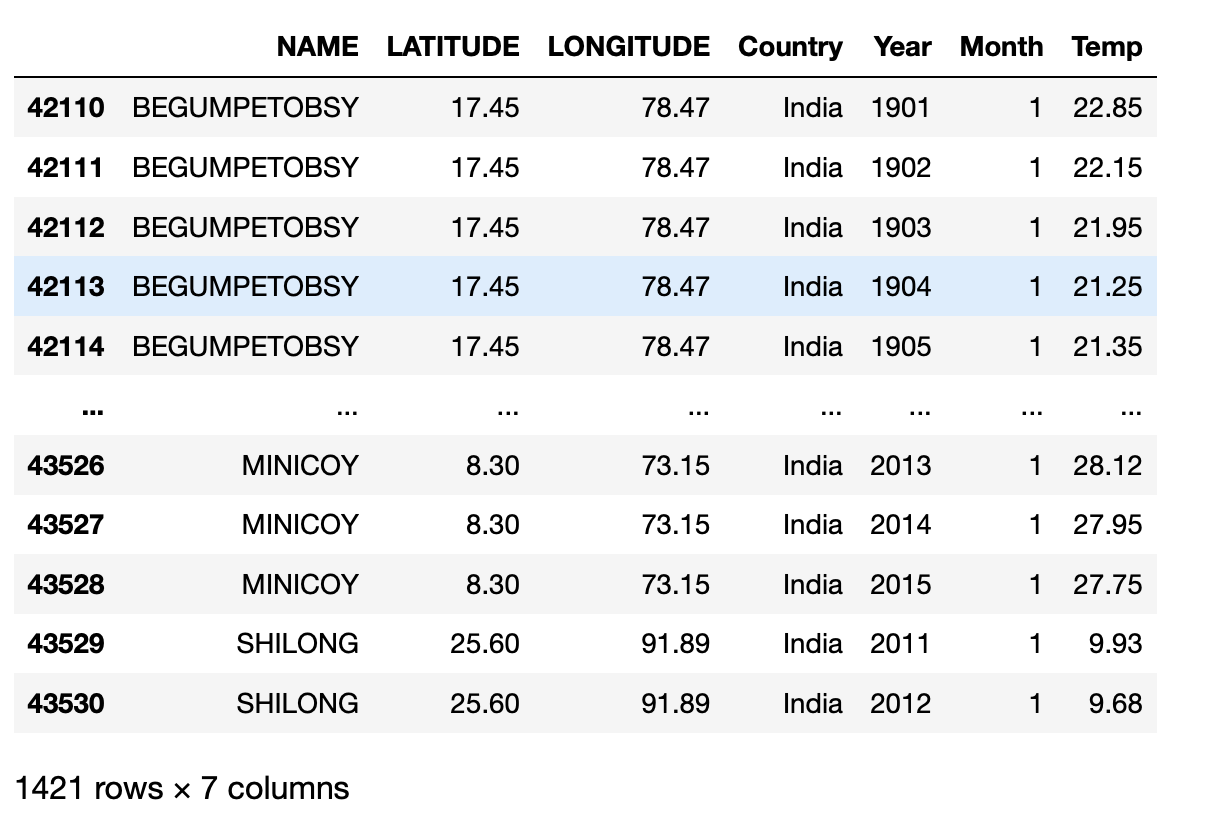

In [7]:
# the passing dataframe 'df' below is the dataframe you create in part 2
query_climate(df = final_df, country = "India", year_begin = 1901, year_end = 2020, month = 1)

,NAME,LATITUDE,LONGITUDE,Country,Year,Month,Temp
7643,BEGUMPETOBSY,17.45,78.47,India,1901,1,22.85
7644,BEGUMPETOBSY,17.45,78.47,India,1902,1,22.15
7645,BEGUMPETOBSY,17.45,78.47,India,1903,1,21.95
7646,BEGUMPETOBSY,17.45,78.47,India,1904,1,21.25
7647,BEGUMPETOBSY,17.45,78.47,India,1905,1,21.35
...,...,...,...,...,...,...,...
78046,ALLAHABAD_BAMHRAULI,25.50,81.90,India,2011,1,NaN
78047,ALLAHABAD_BAMHRAULI,25.50,81.90,India,2012,1,NaN
78048,ALLAHABAD_BAMHRAULI,25.50,81.90,India,2013,1,15.30
78049,SHILONG,25.60,91.89,India,2011,1,9.93


## Part 4: Global warming ( 10 pts )

In this part, the goal is to create a bar plot which is used to compare average temperatures of decadeds 1901-1910 and 2011-2020.

The bar plot looks like the following:

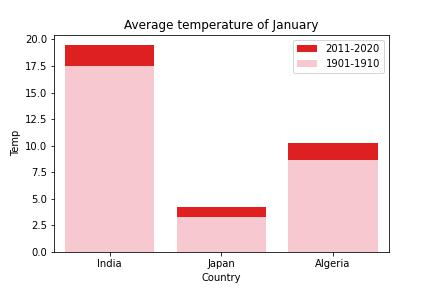

In above plot, I select three different countries and compute the average temperatures of year range 1901-1910 and 2011-2020 in January. Then, I use (two) barplot(s) to visualize the average temperature. 

**You should do more than my sample plot:**

Select 4 different countries and 6 different months, then compute two average temperatures for each country in each certain month. Then visualize 6 different plots (included in a single plot using `subplot` command). Please add necessary labels, titles, and legends to make your plot clear.

You should write a function or class to simplify your code if necessary.

What is your conclusion?

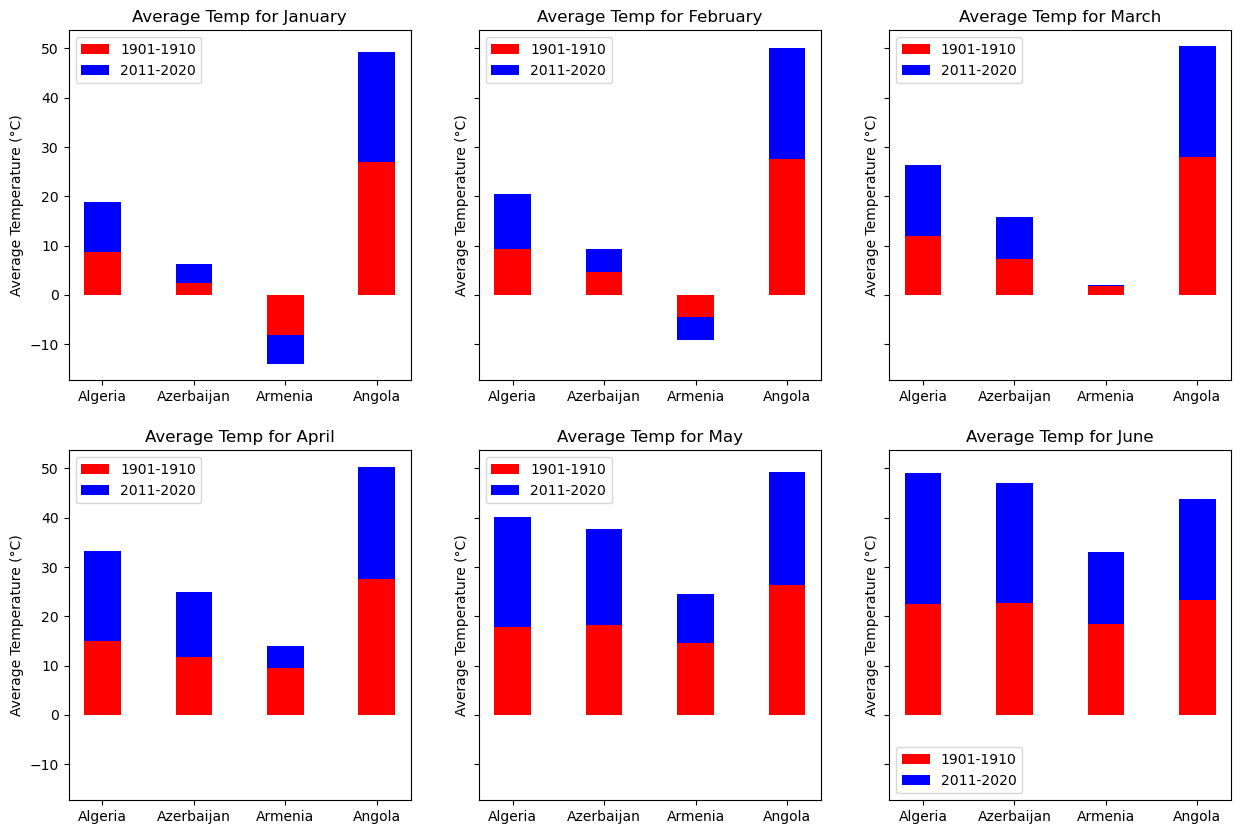

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import calendar

def plot_temp_comparison(df, countries, months, decade1_range, decade2_range):
    # setup the 6 plots
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharey=True)
    axes = axes.flatten()
    
    # iterate through each month to create a subplot
    for idx, month in enumerate(months):
        month_column = month  
        ax = axes[idx]
        
        # create lists to store the average temperatures for each country
        avg_temps_decade1 = []
        avg_temps_decade2 = []
        
        for country in countries:
            # filter the dataframe and calculate averages for the first decade
            temps_decade1 = df[(df['Country_Name'] == country) &
                               (df['Year'].between(*decade1_range))][month_column]
            avg_temps_decade1.append(temps_decade1.mean())
            
            # filter the datafram and calculate averages for the second decade
            temps_decade2 = df[(df['Country_Name'] == country) &
                               (df['Year'].between(*decade2_range))][month_column]
            avg_temps_decade2.append(temps_decade2.mean())  
        
        # define the bar positions
        bar_positions = np.arange(len(countries))
        
        # plot the bars for each decade
        ax.bar(bar_positions, avg_temps_decade1, 0.4, label='1901-1910', color = "r")
        ax.bar(bar_positions, avg_temps_decade2, 0.4, bottom = avg_temps_decade1, label='2011-2020', color = "b")
        
        # create the labels and titles
        ax.set_xticks(bar_positions)
        ax.set_xticklabels(countries)
        ax.set_title(f'Average Temp for {calendar.month_name[month]}')
        ax.set_ylabel('Average Temperature (°C)')
        ax.legend()
    
    plt.show()

countries = ['Algeria', 'Azerbaijan', 'Armenia', 'Angola']
months = [1, 2, 3, 4, 5, 6]
decade1_range = (1901, 1910)
decade2_range = (2011, 2020)

plot_temp_comparison(final_df, countries, months, decade1_range, decade2_range)

From the plots created above it seems that over the course of a century, the average temperature for the 6 countries, Algeria, Azerbaijian, Armenia, and Angola rised significantly, which highlights the severity of global warming.

## Part 5: Plots (15 pts)

In this part, please create at least **three** complex and interesting interactive data visualizations using the dataframe created above. These plots must be of different types (e.g. scatter plot, line plot, histogram, bar plot, and etc) and are different from what you have created in Part 4. You are also welcome to create any plots which are not discussed in the lectures.

Alongside the plots, you should clearly describe (use markdown) what you do for each plot and state your conclusions.

Requirement: You should use seaborn.

**Grading is based on the plots and your description. Your explanation should match your plot.**

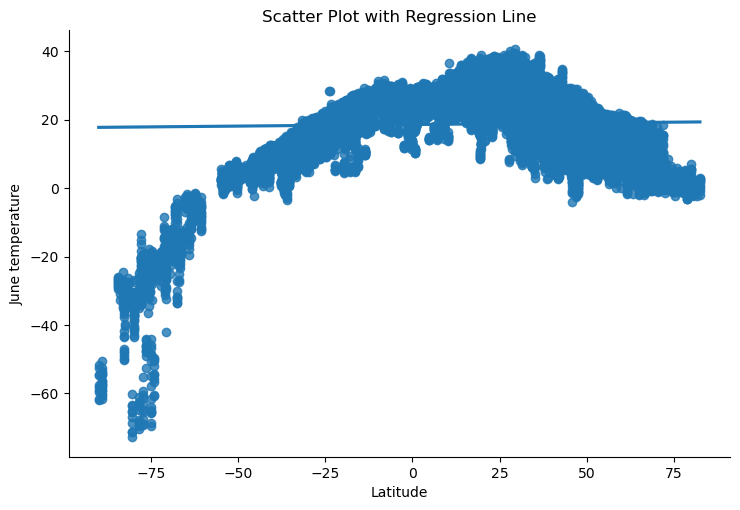

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# ensure column names are treated as strings
final_df.columns = [str(col) for col in final_df.columns]

# creating the scatter plot with a regression line
sns.lmplot(x='Latitude', y='6', data=final_df, aspect=1.5)
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Latitude')
plt.ylabel('June temperature')
plt.show()

The seaborn scatter plot is used to visualize the relationship between latitude and June temperatures. It appears that the data is divided into two distinct clusters, which could represent the lower temperature in the early 1900s vs the higher temperature in the early 2000s. The regression line is somewhat flattened, suggesting that the simple linear model might not be the best fit for this data due to its non-linear nature.

One conclusion is that the temperatures are warmer closer to the equator which is latitude 0 and cooler towards the poles which are latitudes approaching -60 and 60. This pattern reflects the general understanding of climate variation with latitude.

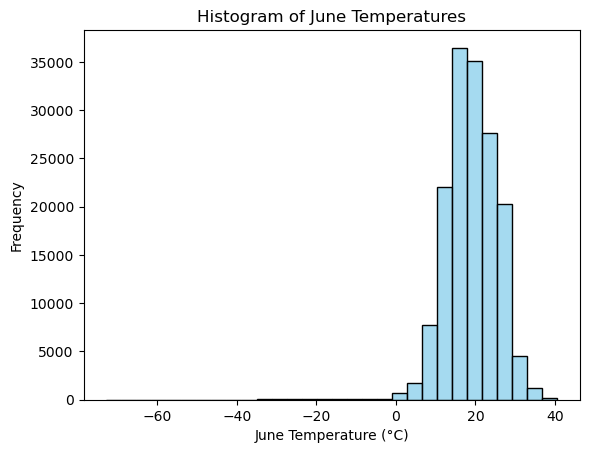

In [11]:
# ensure column names are treated as strings
final_df.columns = [str(col) for col in final_df.columns]

# create a histogram of the June temperatures
sns.histplot(final_df['6'], kde=False, bins=30, color='skyblue')

# labeling the plot
plt.title('Histogram of June Temperatures')
plt.xlabel('June Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


The histogram created using Seaborn's sns.histplot function displays the distribution of June temperatures from final_df['6']. The plot has 30 bins and excludes a KDE overlay. It illustrates the frequency of various temperature intervals.

Looking at the histogram of June temperatures, it's apparent that the majority of temperatures fall between roughly 10°C and 30°C, with the highest frequency in the 20°C to 25°C range, indicating this is the most common temperature interval. The frequencies decrease as temperatures move towards the extremes, with very few occurrences below 0°C or above 40°C. This distribution suggests that June temperatures are typically moderate to warm across the sampled locations, with extremes being relatively rare.

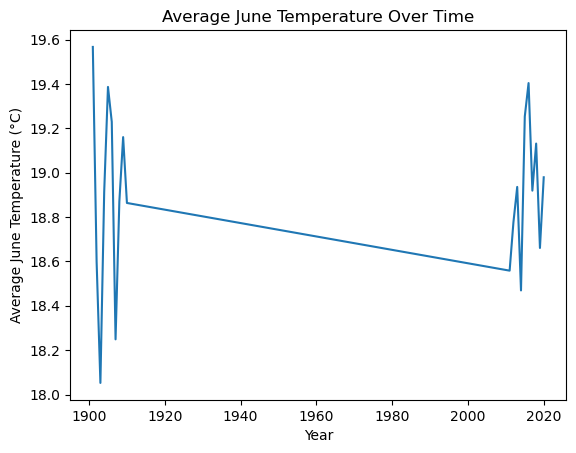

In [12]:
# ensure column names are treated as strings
final_df.columns = [str(col) for col in final_df.columns]

# Calculate the mean temperature for each year
yearly_temps = final_df.groupby('Year')['6'].mean().reset_index()

# create the line plot
sns.lineplot(data=yearly_temps, x='Year', y='6')

# labeling the plot
plt.title('Average June Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Average June Temperature (°C)')
plt.show()

The line plot is to illustrate the trend of average June temperatures throughout the years. The 'Year' column from the dataset serves as the x-axis, and the mean of '6' which represents the June temperature, is plotted on the y-axis.

There are significant fluctuations, especially sharp peaks and drops, suggesting variability in average temperatures from year to year. The most notable spike in temperature occurs shortly before 2020, indicating an exceptionally warmer June in that year. The variations in the plot could be attributed to natural climate variability, specific environmental events

## Publish (5 pts)

Publish your work on github: Create a repository called HW in your github account, then upload your jupyter notebook. You should create a readme.md file to describe this repository. Please include the link in this cell

https://github.com/Meiyi-Ye/HW